##**Analisis de datos - Ejemplo Titanic**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
ruta_titanic = "https://raw.githubusercontent.com/jluzuria2001/Bootcamp2025/refs/heads/main/data/titanic.csv"


### Carga de datos

In [4]:
titanic_df = pd.read_csv(ruta_titanic, index_col=["PasajeroId"])
titanic_df.head()

,Superviviente,Clase,Nombre,Sexo,Edad,numHC,numPH,Ticket,Tarifa,Camarote,Embarcado
PasajeroId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",hombre,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mujer,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",mujer,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mujer,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",hombre,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Superviviente  891 non-null    int64  
 1   Clase          891 non-null    int64  
 2   Nombre         891 non-null    object 
 3   Sexo           891 non-null    object 
 4   Edad           714 non-null    float64
 5   numHC          891 non-null    int64  
 6   numPH          891 non-null    int64  
 7   Ticket         891 non-null    object 
 8   Tarifa         891 non-null    float64
 9   Camarote       204 non-null    object 
 10  Embarcado      889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Sin embargo, desde arriba también podemos ver que tenemos valores perdidos en las columnas - Edad, Cabina, Embarcado.

- Los valores faltantes de Cabina y Embarcado no serán corregidos - porque ninguna pregunta se basa en estos factores
- Los valores que faltan de la edad se corregirán ahora, porque están implicados en varias preguntas y en el análisis que se hace a continuación.

### Solucionar problemas de datos que faltan
Primero tenemos que tratar el problema de las edades que faltan. Si suponemos que las edades que faltan se distribuyen de forma similar a los valores presentes, podemos sustituir los valores que representan la distribución existente.

Para ello, podemos sustituir los valores que faltan por la media.

Para tener los mejores valores representativos poblados - tomaremos la media basada en el Sexo y la Clase en la que viajaba el pasajero. En otras palabras, la media de las edades para el sexo dentro de la clase en la que viajaba, y al reemplazar la edad faltante, estos dos factores se mantendrán en consideración - para utilizar la media de las edades relacionadas.


In [6]:
medias_edades = titanic_df.groupby(['Sexo','Clase'])['Edad'].mean()
medias_edades

Sexo    Clase
hombre  1        41.281386
        2        30.740707
        3        26.507589
mujer   1        34.611765
        2        28.722973
        3        21.750000
Name: Edad, dtype: float64

In [7]:
def remplazar_NaN_edad(row):
    if pd.isnull(row['Edad']):
        return medias_edades[row['Sexo'], row['Clase']]
    else:
        return row['Edad']

In [8]:
titanic_df['Edad'] = titanic_df.apply(remplazar_NaN_edad, axis=1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Superviviente  891 non-null    int64  
 1   Clase          891 non-null    int64  
 2   Nombre         891 non-null    object 
 3   Sexo           891 non-null    object 
 4   Edad           891 non-null    float64
 5   numHC          891 non-null    int64  
 6   numPH          891 non-null    int64  
 7   Ticket         891 non-null    object 
 8   Tarifa         891 non-null    float64
 9   Camarote       204 non-null    object 
 10  Embarcado      889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
titanic_df.tail(3)

,Superviviente,Clase,Nombre,Sexo,Edad,numHC,numPH,Ticket,Tarifa,Camarote,Embarcado
PasajeroId,,,,,,,,,,,
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",mujer,21.75,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",hombre,26.00,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",hombre,32.00,0,0,370376,7.75,NaN,Q


Text(0.5, 1.0, 'Histograma de edad')

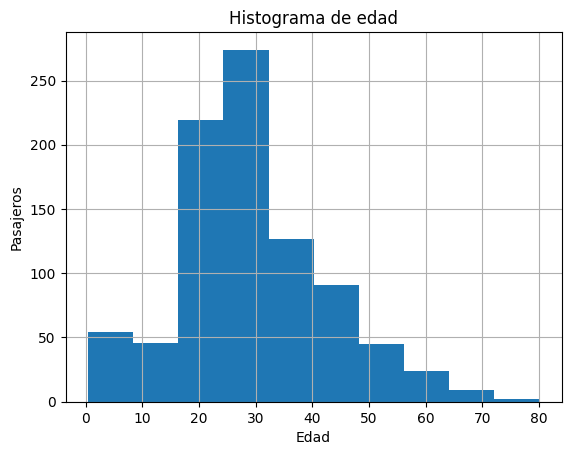

In [10]:
titanic_df.Edad.hist()
plt.xlabel('Edad')
plt.ylabel('Pasajeros')
plt.title('Histograma de edad')

Text(0.5, 1.0, 'Número de padres/hijos a bordo')

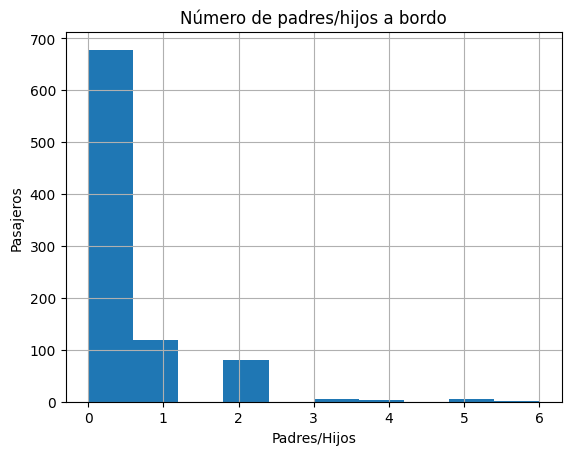

In [11]:
titanic_df.numPH.hist()
plt.xlabel('Padres/Hijos')
plt.ylabel('Pasajeros')
plt.title('Número de padres/hijos a bordo')

Text(0.5, 1.0, 'Número de hermanos/cónyuges a bordo')

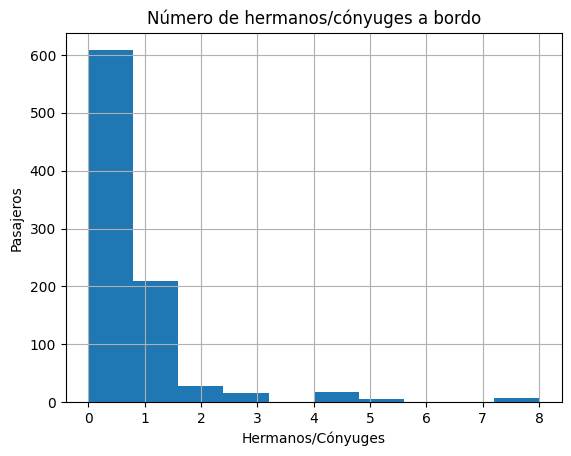

In [12]:
titanic_df.numHC.hist()
plt.xlabel('Hermanos/Cónyuges')
plt.ylabel('Pasajeros')
plt.title('Número de hermanos/cónyuges a bordo')

#### De lo anterior se desprende que

* El pasajero más viejo tenía 80 años
* El pasajero más joven tenía unos 5 meses
* La edad media de los pasajeros era de 29,32 años, pero hay que tener en cuenta que también faltan edades.
* La media de supervivencia es de 0,3838
* La tarifa máxima cobrada fue de 512,33 dólares
* El número máximo de hermanos/cónyuges fue de 8
* El número máximo de padres e hijos fue de 6


#### Preguntas en mente
1. ¿La clase de pasajero influyó en su supervivencia?
2. ¿Qué género tenía más posibilidades de sobrevivir?
3. ¿La persona que viajaba con otros tenía más posibilidades de sobrevivir?
4. ¿Qué grupo de edad tenía más posibilidades de sobrevivir?
5. ¿Cuál fue la supervivencia de hombres y mujeres por clase y por edad?


### Pregunta 1 - ¿La clase de pasajero influyó en su supervivencia?


In [13]:
## SUBSET DATAFRAME PARA LOS DATOS SOLICITADOS

supervivientes_por_clase_de_pasajero_DF = titanic_df[['Superviviente', 'Clase']]          # Solo las columnas requeridas
supervivientes_por_clase_de_pasajero_DF.head()


,Superviviente,Clase
PasajeroId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3


In [73]:
## AGRUPA LOS DATOS PARA CALCULAR LA SUPERVIVENCIA Y EL TOTAL POR CLASE DE PASAJERO

## calcular la supervivencia por clase de pasajero
supervivientes_por_clase = supervivientes_por_clase_de_pasajero_DF.groupby(['Clase']).sum()
total_por_clase = supervivientes_por_clase_de_pasajero_DF.groupby(['Clase']).count()

# el total se muestra como superviviente - así que cambia el nombre de la columna Total
total_por_clase.rename(columns = {'Superviviente':'Total'}, inplace = True)

# fusionar los datos separados en un marco de datos
supervivientes_totales_por_clase = pd.merge(supervivientes_por_clase, total_por_clase, left_index=True, right_index=True) # fusionar por el index
supervivientes_totales_por_clase

,Superviviente,Total
Clase,,
1,136,216
2,87,184
3,119,491


In [74]:
porcentaje_supervivientes = (supervivientes_totales_por_clase['Superviviente'] / supervivientes_totales_por_clase['Total']) * 100
supervivientes_totales_por_clase['Porcentaje'] = porcentaje_supervivientes

supervivientes_totales_por_clase

,Superviviente,Total,Porcentaje
Clase,,,
1,136,216,62.962963
2,87,184,47.282609
3,119,491,24.236253


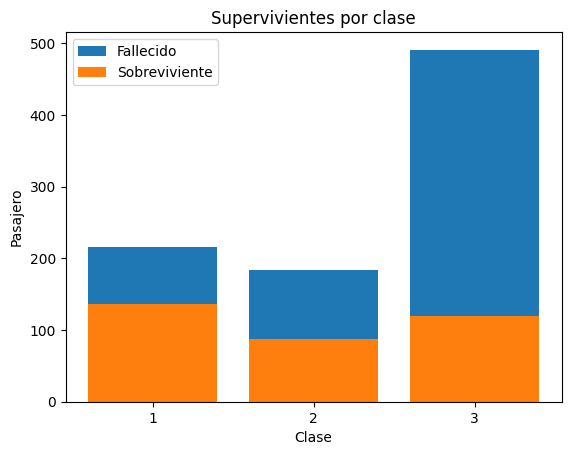

In [75]:
x = supervivientes_totales_por_clase.index.values
ht = supervivientes_totales_por_clase.Total
hs = supervivientes_totales_por_clase.Superviviente

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, x)
plt.xlabel('Clase')
plt.ylabel('Pasajero')
plt.title('Supervivientes por clase')


plt.legend([pht,phs],['Fallecido', 'Sobreviviente'])

### p1- Conclusión

Como se puede ver en la visualización y también en la tabla del marco de datos anterior,
los pasajeros de primera clase tuvieron la mayor tasa de supervivencia,
luego los de segunda clase y la menor tasa de supervivencia fue la de los pasajeros de tercera clase.
Un gran número de pasajeros viajaba en 3ª clase (491), pero sólo el 24,24% sobrevivió.



### Pregunta 2 - ¿Qué género tuvo más supervivencia?


In [76]:
## CALCULAR LA SUPERVIVENCIA Y EL TOTAL POR SEXO

# groupby Sex
grupos_por_sexo = titanic_df.groupby('Sexo')

# calcular los supervivientes por sexo
supervivientes_por_sexo = grupos_por_sexo['Superviviente'].sum()
supervivientes_por_sexo.name = 'Superviviente'

# Calcular el total por sexo
total_por_sexo = grupos_por_sexo['Superviviente'].size()
total_por_sexo.name = 'Total'

# concatenar los resultados separados en un marco de datos
supervivientes_total_por_sexo = pd.concat([supervivientes_por_sexo, total_por_sexo], axis=1)
supervivientes_total_por_sexo

,Superviviente,Total
Sexo,,
hombre,109,577
mujer,233,314


In [77]:
porcentaje_supervivientes = (supervivientes_total_por_sexo['Superviviente'] / supervivientes_total_por_sexo['Total']) * 100
supervivientes_total_por_sexo['Porcentaje'] = porcentaje_supervivientes

supervivientes_total_por_sexo

,Superviviente,Total,Porcentaje
Sexo,,,
hombre,109,577,18.890815
mujer,233,314,74.203822


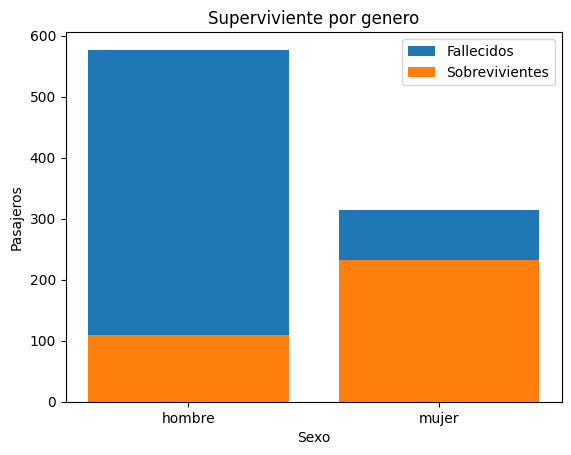

In [19]:
x = range(len(supervivientes_total_por_sexo.index.values))
ht = supervivientes_total_por_sexo.Total
hs = supervivientes_total_por_sexo.Superviviente

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, supervivientes_total_por_sexo.index.values)
plt.xlabel('Sexo')
plt.ylabel('Pasajeros')
plt.title('Superviviente por genero')

plt.legend([pht,phs],['Fallecidos', 'Sobrevivientes'])

### Conclusión p2

A partir de la visualización y el porcentaje de supervivencia de la impresión del marco de datos anterior,
podemos ver que las mujeres tienen una tasa de supervivencia muy alta.
La tasa de supervivencia de las mujeres fue del 74,3% y la de los hombres del 18,9%,
por lo que la tasa de supervivencia de las mujeres fue aproximadamente 4 veces superior a la de los hombres.

Se puede concluir que las mujeres tuvieron preferencia en las operaciones de rescate,
y los hombres debieron sacrificarse para que las hembras sobrevivieran.

### Pregunta 3 - ¿Las personas que viajaban con otras tenían más posibilidades de sobrevivir?
Veamos primero la distribución de los que iban solos y los que iban acompañados.


In [20]:
no_esta_solo = (titanic_df.numHC + titanic_df.numPH) >= 1
pasajeros_acompañados = titanic_df[no_esta_solo]

print('Resumen Viajeros Acompañados')
pasajeros_acompañados.describe()

Resumen Viajeros Acompañados


,Superviviente,Clase,Edad,numHC,numPH,Tarifa
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.505650,2.169492,26.316614,1.316384,0.960452,48.832275
std,0.500676,0.864520,14.901225,1.420774,1.039512,55.307615
min,0.000000,1.000000,0.420000,0.000000,0.000000,6.495800
25%,0.000000,1.000000,17.000000,1.000000,0.000000,18.000000
50%,1.000000,2.000000,26.000000,1.000000,1.000000,27.750000
75%,1.000000,3.000000,36.000000,1.000000,2.000000,59.044800
max,1.000000,3.000000,70.000000,8.000000,6.000000,512.329200


In [21]:
esta_solo = (titanic_df.numHC + titanic_df.numPH) == 0
pasajeros_solos = titanic_df[esta_solo]

print('Resumen Viajeros Solos')
pasajeros_solos.describe()

Resumen Viajeros Solos


,Superviviente,Clase,Edad,numHC,numPH,Tarifa
count,537.000000,537.000000,537.000000,537.0,537.0,537.000000
mean,0.303538,2.400372,31.297634,0.0,0.0,21.242689
std,0.460214,0.804511,11.694910,0.0,0.0,42.223510
min,0.000000,1.000000,5.000000,0.0,0.0,0.000000
25%,0.000000,2.000000,23.000000,0.0,0.0,7.775000
50%,0.000000,3.000000,27.000000,0.0,0.0,8.137500
75%,1.000000,3.000000,36.000000,0.0,0.0,15.000000
max,1.000000,3.000000,80.000000,0.0,0.0,512.329200


Text(0.5, 1.0, 'Edades de los pasajeros solos y acompañados')

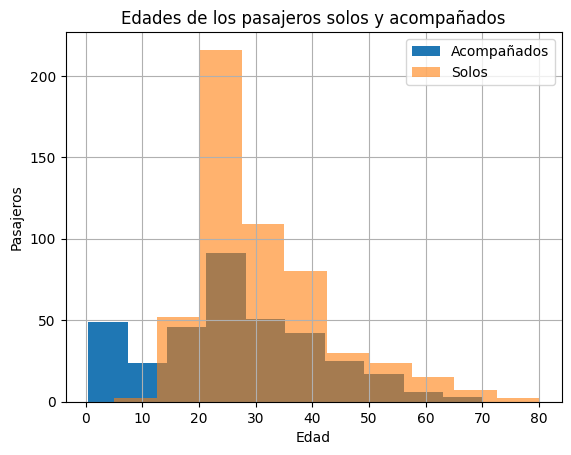

In [22]:
pasajeros_acompañados.Edad.hist(label='Acompañados')
pasajeros_solos.Edad.hist(label='Solos', alpha=0.6) # transparencia en las barras

plt.xlabel('Edad')
plt.ylabel('Pasajeros')
plt.legend(loc='best')
plt.title('Edades de los pasajeros solos y acompañados')

De la distribución anterior podemos ver que

- Los que están en el rango de edad de 0 a 10 años, es decir, los niños, no estaban solos - lo que tiene sentido
- Sin embargo, hay un niño de 5 años que estaba solo.
- También había una persona de 80 años que iba sola
- 537 pasajeros iban solos, mientras que 354 iban acompañados
- Excepto en el grupo de edad de 0 a 10 años, en todos los demás grupos de edad, los que viajaban solos superaban a los que viajaban acompañados.

Ahora vamos a revisar estos por su supervivencia

In [23]:
acompañados = np.where((titanic_df.numHC + titanic_df.numPH) >= 1, 'Acompañados', 'Solos')
resumen_soledad = titanic_df.groupby(acompañados, as_index=False)['Superviviente'].agg([np.sum, np.size])
resumen_soledad = resumen_soledad.rename(columns={'sum':'Superviviente', 'size':'Total'})

resumen_soledad


<ipython-input-23-aa9f8778f764>:2: FutureWarning: The provided callable <function sum at 0x79c83251c400> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  resumen_soledad = titanic_df.groupby(acompañados, as_index=False)['Superviviente'].agg([np.sum, np.size])


,index,Superviviente,Total
0,Acompañados,179,354
1,Solos,163,537


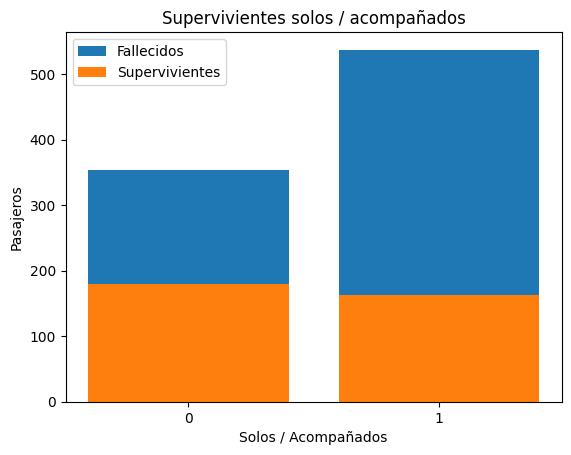

In [24]:
x = range(len(resumen_soledad.index.values))
ht = resumen_soledad.Total
hs = resumen_soledad.Superviviente

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, resumen_soledad.index.values)
plt.xlabel('Solos / Acompañados')
plt.ylabel('Pasajeros')
plt.title('Supervivientes solos / acompañados')


plt.legend([pht,phs],['Fallecidos', 'Supervivientes'])

### Conclusión p3

Los porcentajes y las visualizaciones anteriores indican claramente que las personas que viajaban acompañadas tenían una mayor tasa de supervivencia.



### Pregunta 4 - ¿Qué grupo de edad tiene más posibilidades de sobrevivir?

En primer lugar, revisemos la distribución por edades de los géneros


In [25]:
edades_masculinas = (titanic_df[titanic_df.Sexo == 'hombre'])['Edad']
edades_masculinas.describe()

,Edad
count,577.000000
mean,30.423672
std,13.264336
min,0.420000
25%,23.000000
50%,27.000000
75%,37.000000
max,80.000000


In [26]:
feedades_masculinas = (titanic_df[titanic_df.Sexo == 'mujer'])['Edad']
feedades_masculinas.describe()

,Edad
count,314.000000
mean,27.288063
std,13.091327
min,0.750000
25%,21.000000
50%,24.000000
75%,35.000000
max,63.000000


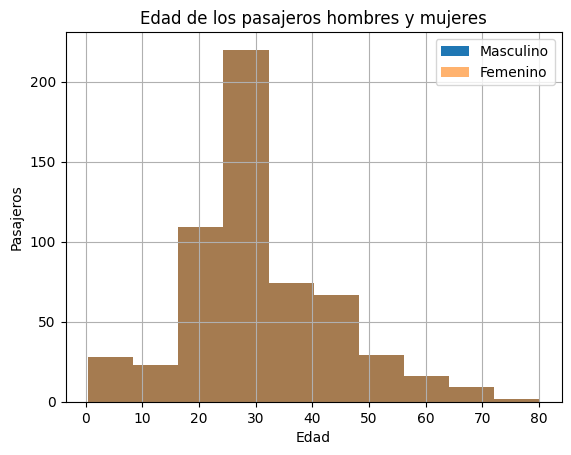

In [27]:
edades_masculinas.hist(label='Masculino')
edades_masculinas.hist(label='Femenino', alpha=0.6)

plt.xlabel('Edad')
plt.ylabel('Pasajeros')
plt.title('Edad de los pasajeros hombres y mujeres')
plt.legend(loc='best')

De la distribución anterior, podemos ver que:

- En todos los grupos de edad, el número de mujeres era menor que el de hombres.
- La edad de la mujer de más edad era de 63 años, mientras que la edad del hombre de más edad era de 80 años.
Ahora vamos a hacer un análisis de supervivencia por grupos de edad


In [28]:
def grupos_de_edad(edad):
    if edad >= 80:
        return '80-89'
    if edad >= 70:
        return '70-79'
    if edad >= 60:
        return '60-69'
    if edad >= 50:
        return '50-59'
    if edad >= 40:
        return '40-49'
    if edad >= 30:
        return '30-39'
    if edad >= 20:
        return '20-29'
    if edad >= 10:
        return '10-19'
    if edad >= 0:
        return '0-9'

titanic_df['Grupo de Edad'] = titanic_df.Edad.apply(grupos_de_edad)
titanic_df.head(3)

,Superviviente,Clase,Nombre,Sexo,Edad,numHC,numPH,Ticket,Tarifa,Camarote,Embarcado,Grupo de Edad
PasajeroId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",hombre,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mujer,38.0,1,0,PC 17599,71.2833,C85,C,30-39
3,1,3,"Heikkinen, Miss. Laina",mujer,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29


In [29]:
resumen_grupos_de_edad = titanic_df.groupby(['Grupo de Edad'], as_index=False)['Superviviente'].agg([np.sum, np.size])
resumen_grupos_de_edad = resumen_grupos_de_edad.rename(columns={'sum':'Superviviente', 'size':'Total'})
resumen_grupos_de_edad

<ipython-input-29-a196bb54fc42>:1: FutureWarning: The provided callable <function sum at 0x79c83251c400> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  resumen_grupos_de_edad = titanic_df.groupby(['Grupo de Edad'], as_index=False)['Superviviente'].agg([np.sum, np.size])


,Grupo de Edad,Superviviente,Total
0,0-9,38,62
1,10-19,41,102
2,20-29,113,358
3,30-39,84,185
4,40-49,39,110
5,50-59,20,48
6,60-69,6,19
7,70-79,0,6
8,80-89,1,1


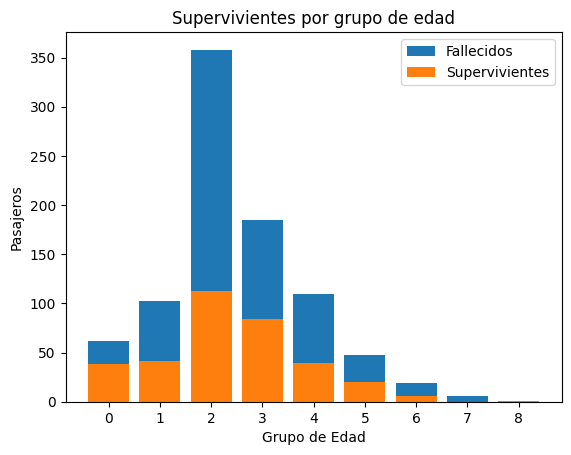

In [30]:
x = range(len(resumen_grupos_de_edad.index.values))
ht = resumen_grupos_de_edad.Total
hs = resumen_grupos_de_edad.Superviviente

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, resumen_grupos_de_edad.index.values)
plt.xlabel('Grupo de Edad')
plt.ylabel('Pasajeros')
plt.title('Supervivientes por grupo de edad')

plt.legend([pht,phs],['Fallecidos', 'Supervivientes'])

In [31]:
resumen_grupos_de_edad['Porcentaje Supervivientes'] = (resumen_grupos_de_edad.Superviviente / resumen_grupos_de_edad.Total) * 100
resumen_grupos_de_edad['Porcentaje Fallecidos'] = ((resumen_grupos_de_edad.Total - resumen_grupos_de_edad.Superviviente) / resumen_grupos_de_edad.Total) * 100
resumen_grupos_de_edad

,Grupo de Edad,Superviviente,Total,Porcentaje Supervivientes,Porcentaje Fallecidos
0,0-9,38,62,61.290323,38.709677
1,10-19,41,102,40.196078,59.803922
2,20-29,113,358,31.564246,68.435754
3,30-39,84,185,45.405405,54.594595
4,40-49,39,110,35.454545,64.545455
5,50-59,20,48,41.666667,58.333333
6,60-69,6,19,31.578947,68.421053
7,70-79,0,6,0.000000,100.000000
8,80-89,1,1,100.000000,0.000000


De la visualización y los porcentajes anteriores podemos ver que la mayoría de los supervivientes eran del grupo de edad de 20 a 29 años.

Pero, curiosamente, el porcentaje de supervivencia del grupo de 0 a 9 años es el mejor, con un 61,29%.

También hemos visto que las mujeres tienen una mejor tasa de supervivencia, por lo que estas tasas de supervivencia deben ser una mezcla de las tasas de supervivencia de hombres y mujeres, y por lo tanto, para tener una mejor visión, el aspecto del género también debe ser tomado en consideración.

In [33]:
resumen_sexo_grupo_edad = titanic_df.groupby(['Sexo','Grupo de Edad'], as_index=False)['Superviviente'].mean()
resumen_sexo_grupo_edad

,Sexo,Grupo de Edad,Superviviente
0,hombre,0-9,0.593750
1,hombre,10-19,0.122807
2,hombre,20-29,0.140496
3,hombre,30-39,0.215517
4,hombre,40-49,0.217949
5,hombre,50-59,0.133333
6,hombre,60-69,0.133333
7,hombre,70-79,0.000000
8,hombre,80-89,1.000000
9,mujer,0-9,0.633333


In [34]:
resumen_grupoedad_hombres = resumen_sexo_grupo_edad[resumen_sexo_grupo_edad['Sexo'] == 'hombre']
resumen_grupoedad_hombres

,Sexo,Grupo de Edad,Superviviente
0,hombre,0-9,0.593750
1,hombre,10-19,0.122807
2,hombre,20-29,0.140496
3,hombre,30-39,0.215517
4,hombre,40-49,0.217949
5,hombre,50-59,0.133333
6,hombre,60-69,0.133333
7,hombre,70-79,0.000000
8,hombre,80-89,1.000000


In [35]:
resumen_grupoedad_mujeres = resumen_sexo_grupo_edad[resumen_sexo_grupo_edad['Sexo'] == 'mujer']
resumen_grupoedad_mujeres

,Sexo,Grupo de Edad,Superviviente
9,mujer,0-9,0.633333
10,mujer,10-19,0.755556
11,mujer,20-29,0.681034
12,mujer,30-39,0.855072
13,mujer,40-49,0.687500
14,mujer,50-59,0.888889
15,mujer,60-69,1.000000


In [36]:
grupos_de_edad = titanic_df['Grupo de Edad'].unique()
grupos_de_edad

array(['20-29', '30-39', '50-59', '0-9', '10-19', '40-49', '60-69',
       '70-79', '80-89'], dtype=object)

In [37]:
etiquetas_edad = sorted(grupos_de_edad)
print(etiquetas_edad)

['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']


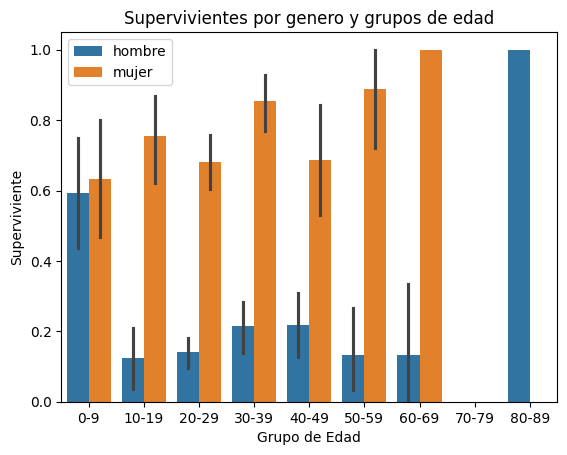

In [38]:
ax = sns.barplot(x='Grupo de Edad', y='Superviviente', data=titanic_df, hue='Sexo', order=etiquetas_edad)
ax.set_title('Supervivientes por genero y grupos de edad')
plt.legend(loc='best')

### Conclusión p4

De las proporciones anteriores y de la visualización, teniendo en cuenta el sexo y el grupo de edad, se desprende claramente que las mujeres y los niños tienen preferencia en operaciones de rescate por parte de los otros pasajeros masculinos.
El grupo de edad de 0 a 9 años, tanto masculino como femenino, tuvo una tasa de supervivencia muy alta.



### Pregunta 5 - ¿Cuál fue la supervivencia masculina y femenina por clase y por edad?

Hombres y mujeres por clase
Revisemos los hombres y las mujeres, por clases de pasajeros



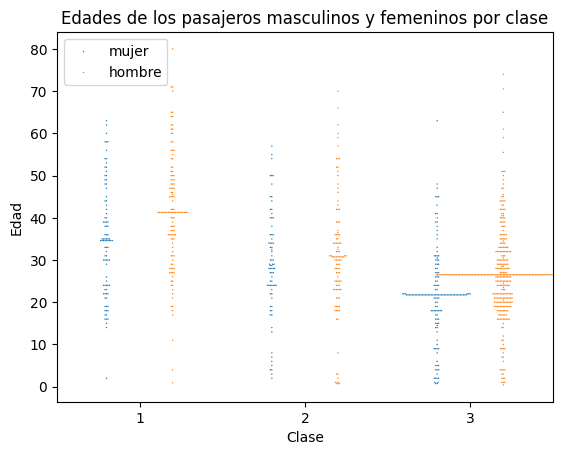

In [43]:
ax = sns.swarmplot(x='Clase', y='Edad', data=titanic_df, hue='Sexo', dodge=True, size=1)
ax.set_title('Edades de los pasajeros masculinos y femeninos por clase')
plt.legend(loc='best')

Arriba podemos ver que, en comparación con la primera y la segunda clase,
había un gran número de pasajeros en tercera clase.
En particular, los hombres estaban en gran número ...
por el aspecto del enjambre, estaban en gran número en la edad de 18 a 32 años.

Para entender la distribución de la edad de hombres y mujeres en las diferentes clases,
el mejor gráfico es el de caja.

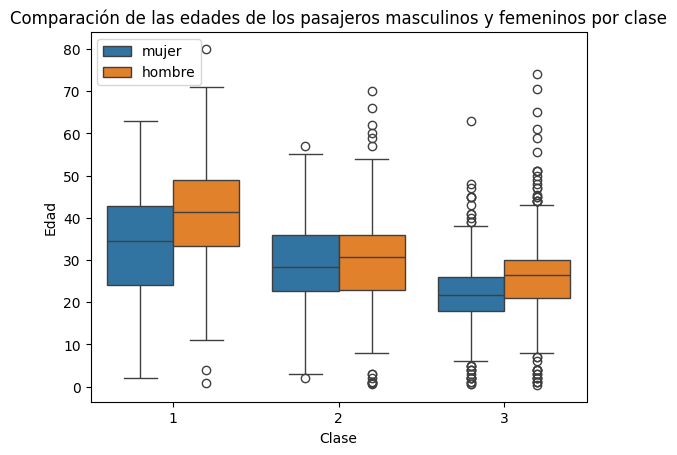

In [44]:
ax = sns.boxplot(x='Clase', y='Edad', data=titanic_df, hue='Sexo')
ax.set_title('Comparación de las edades de los pasajeros masculinos y femeninos por clase')
plt.legend(loc='best')

De lo anterior se desprende que la edad media de los hombres y mujeres de la 3ª clase era menor
que la de los hombres y mujeres de la 2ª y 1ª clase.
La edad media más alta de los hombres fue en la primera clase.

Pero este gráfico sólo da una idea de la distribución de las edades de los hombres y las mujeres por clase.

Ahora vamos a tratar de entender la supervivencia de hombres y mujeres, por clase

#### Supervivencia de hombres y mujeres por clase y por edad


In [46]:
def scatter(passengers, marker='o', legend_prefix=''):
    sobrevivio = passengers[passengers.Superviviente == 1]
    fallecio = passengers[passengers.Superviviente == 0]

    x = sobrevivio.Edad
    y = sobrevivio.Tarifa
    plt.scatter(x, y, c='blue', alpha=0.5, marker=marker, label=legend_prefix + ' Superviviente')

    x = fallecio.Edad
    y = fallecio.Tarifa
    plt.scatter(x, y, c='red', alpha=0.5, marker=marker, label=legend_prefix + ' Fallecido')


In [47]:
def dispersion_por_clase(pasajero_clase):
    clase_pasajero = titanic_df[titanic_df.Clase == pasajero_clase]

    pasajero_hombre = clase_pasajero[clase_pasajero.Sexo == 'hombre']
    pasajero_mujer = clase_pasajero[clase_pasajero.Sexo == 'mujer']

    scatter(pasajero_hombre, marker='o', legend_prefix='Hombre')
    scatter(pasajero_mujer, marker='^', legend_prefix='Mujer')

    plt.legend(bbox_to_anchor=(0,1), loc='best') # bbox - to move legend out of plot/scatter
    plt.xlabel('Edad')
    plt.ylabel('Tarifa')
    plt.title('Supervivencia de género por edad y Clase = ' + str(pasajero_clase))

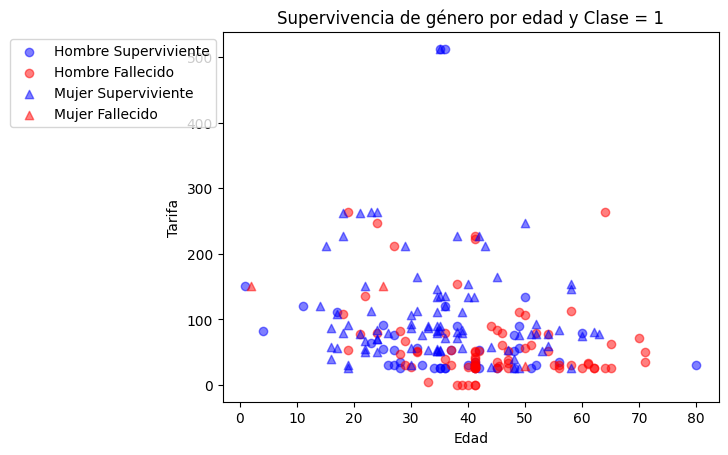

In [48]:
dispersion_por_clase(1)

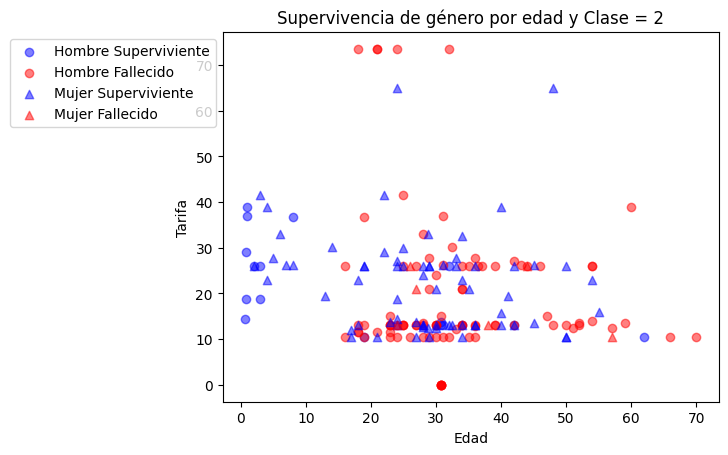

In [49]:
dispersion_por_clase(2)

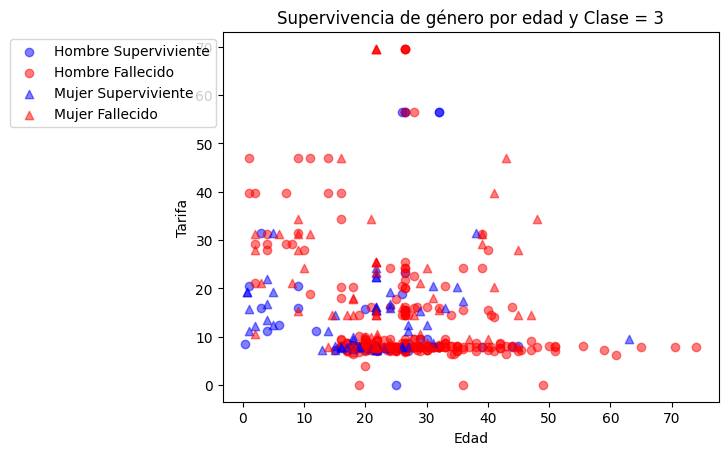

In [50]:
dispersion_por_clase(3)

Los tres gráficos de dispersión anteriores ofrecen una visión de la edad y la supervivencia
de hombres y mujeres en cada una de las clases.

Pero para una mejor claridad y comprensión,
podemos separar los gráficos de dispersión para hombres y mujeres, por clase.

Esto es lo que haremos a continuación.

In [81]:
def sns_dispersion_por_clase(pasajero_clase):
    fg = sns.FacetGrid(titanic_df[titanic_df['Clase'] == pasajero_clase],
                      col='Sexo',
                      col_order=['mujer', 'hombre'],
                      hue='Superviviente',
                      hue_kws=dict(marker=['v', '^']),
                      height=6,
                      palette='Set1')

    fg = (fg.map(plt.scatter, 'Edad', 'Tarifa', edgecolor='w', alpha=0.7, s=80).add_legend())
    plt.subplots_adjust(top=0.9)
    fg.fig.suptitle('Supervivencia por Edad, en {}a CLASE'.format(pasajero_clase))

Dibujamos por separado, porque en forma comparativa los datos de hombres y mujeres en el mismo gráfico de dispersión son difíciles de entender

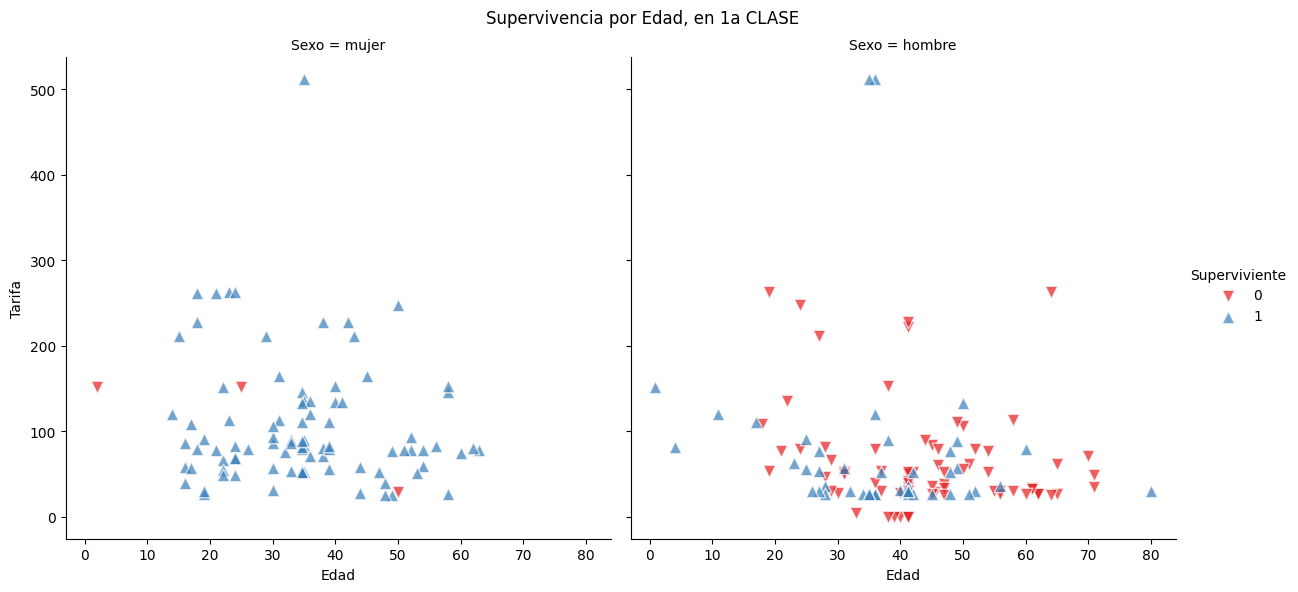

In [82]:
sns_dispersion_por_clase(1)

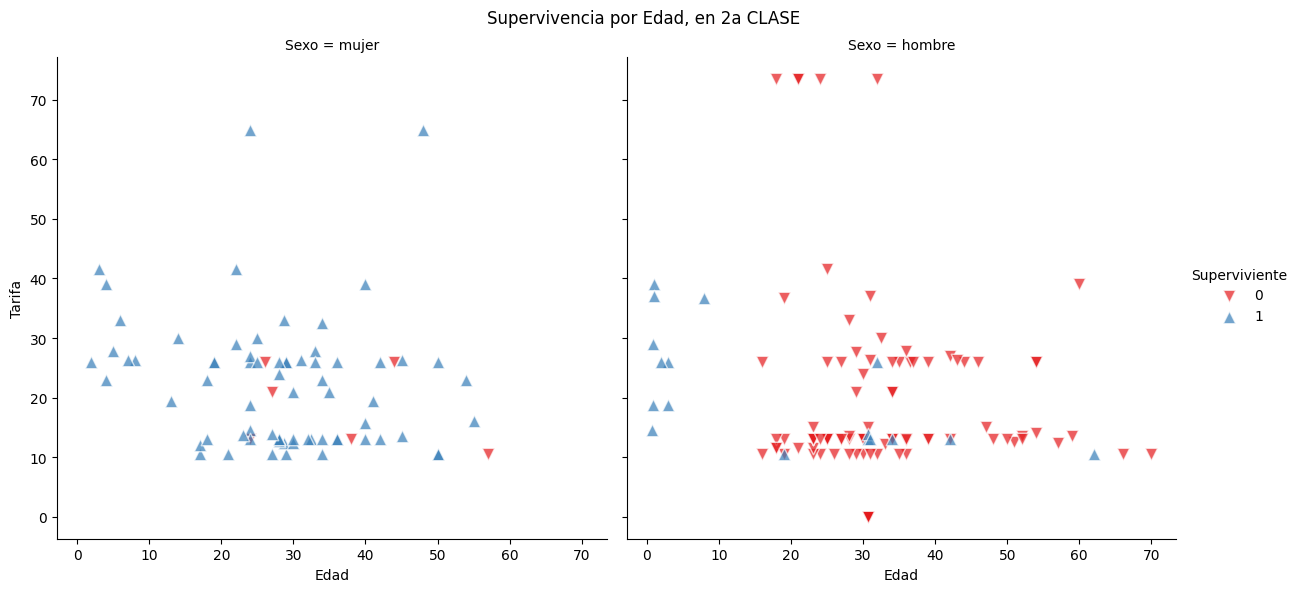

In [83]:
sns_dispersion_por_clase(2)

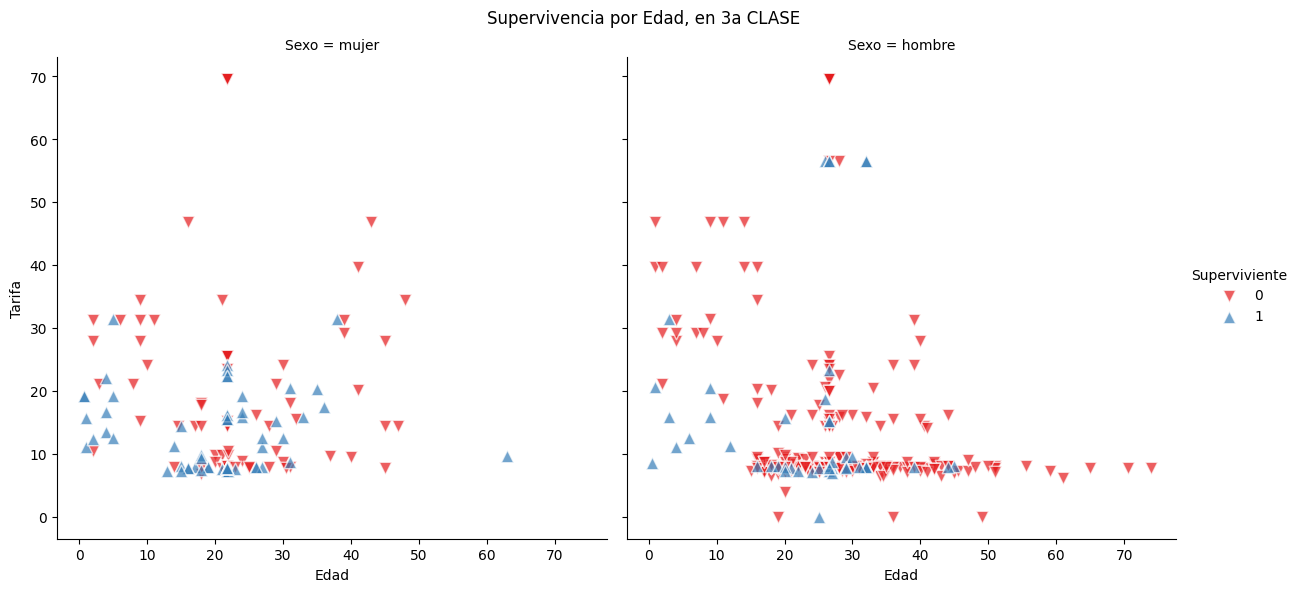

In [84]:
sns_dispersion_por_clase(3)

### Conclusión
De los gráficos de dispersión anteriores tenemos mucha claridad sobre la distribución de la edad de los hombres y las mujeres, y la supervivencia.

Podemos observar lo siguiente

- Las mujeres de primera y segunda clase se salvaron/supervivieron en su mayoría.
- En la primera y segunda clase, los niños de ambos sexos (grupo de edad 0-10) sobrevivieron casi todos.
- En la tercera clase, la tasa de supervivencia de las mujeres fue mayor que la de los hombres,
pero la supervivencia de las hembras fue menor que la de las hembras de la primera y la segunda clase.

Podemos confirmar la observación anterior con el siguiente gráfico de barras, que muestra la tasa de supervivencia por clase y por sexo.


Text(0.5, 1.0, 'Supervivencia de género por clase')

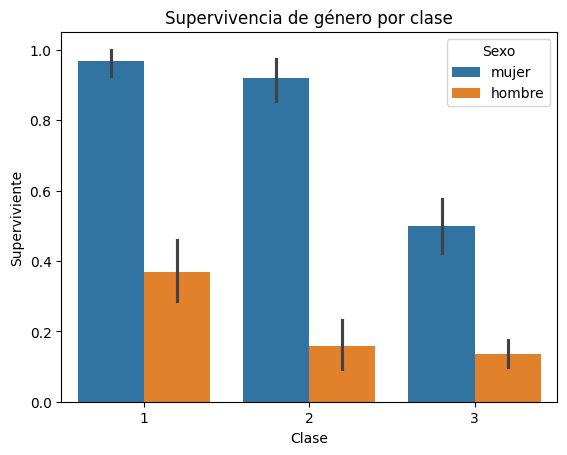

In [85]:
ax = sns.barplot(x='Clase', y='Superviviente', data=titanic_df, hue='Sexo')
ax.set_title('Supervivencia de género por clase')

 ## Conclusión general

### Resultados
- La tasa de supervivencia de las mujeres fue del 74,3% y la de los hombres del 18,9%, por lo que la tasa de supervivencia de las mujeres fue aproximadamente 4 veces superior a la de los hombres. Por lo tanto, las mujeres y los niños tuvieron preferencia en las operaciones de rescate, y debieron ser salvados por otros pasajeros masculinos.

- El 62,96% de los pasajeros de 1ª clase sobrevivieron, mientras que la tasa de supervivencia de los pasajeros de 3ª clase fue del 24,24%, lo que supone aproximadamente un tercio de los pasajeros de 1ª clase. Resulta sorprendente que los pasajeros de 1ª clase tengan una supervivencia elevada, es decir, que se les dio preferencia por su clase social.

- El 50% de los pasajeros que viajaban con familia sobrevivieron, mientras que el porcentaje de supervivencia fue del 30% para los que viajaban solos. Por lo tanto, la tasa de supervivencia fue alta para los pasajeros que viajaban con la familia, en comparación con los que viajaban solos.

- La tasa de supervivencia de los niños es mayor que la de los adultos.

### Limitaciones



- Limitaciones en el análisis
 - Para llegar a las conclusiones sólo se han utilizado la visualización, las proporciones y los porcentajes. Sin embargo, se podría mejorar el análisis utilizando pruebas estadísticas.

- Limitaciones de los datos
 - El conjunto de datos tiene algunas limitaciones: faltan datos para ciertas características/propiedades de los pasajeros,
como la edad.
 - Además, estos datos son sólo una muestra de la población/datos completos del Titanic.
 - Los datos que faltan y el tamaño de la muestra podrían distorsionar los resultados,
por ejemplo, debido a la falta de edad.
Además, no sabemos si la muestra fue seleccionada al azar.


### Planes futuros
Trabajo futuro o áreas potenciales a explorar

- Sólo se utilizaron tres parámetros en el análisis (edad, sexo y clase de pasajero),
aunque es posible realizar más análisis.

- Otras preguntas:
 - ¿Tiene una persona con una tarifa más alta más probabilidades de sobrevivir?  
 - ¿La cubierta del camarote influyó en la tasa de supervivencia?  
 - ¿Existe alguna relación entre la supervivencia y el título de una persona (como Sr., Sra., Srta., etc.)?

Fuente:
    
    https://github.com/vikramsjn/Investigate-Titanic-Dataset/